In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from tabulate import tabulate

Reading Data

In [3]:
df = pd.read_csv("your_data.csv")

Univariate Data Analysis

Target (Smoking) Disribution

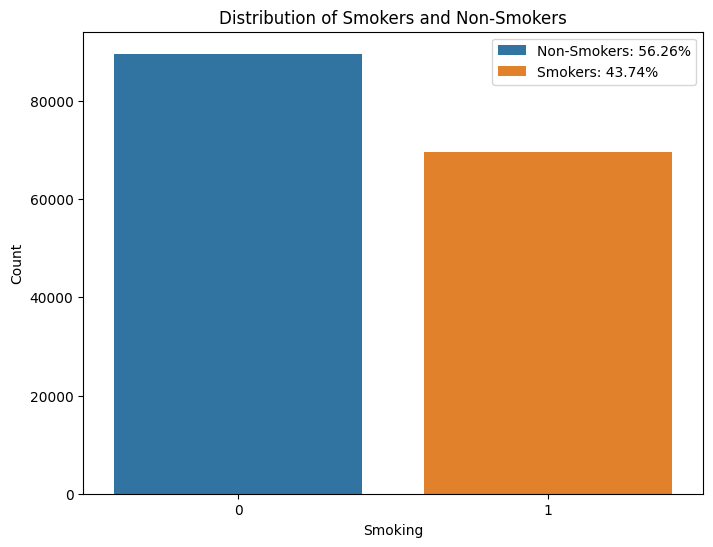

In [68]:
target = df[["smoking"]]
num_samples = len(df)
smokers_count = len(df[df["smoking"] == 1])
nonsmokers_count = len(df[df["smoking"] == 0])
somkers_percentage = 100 * smokers_count/num_samples
nonsmokers_percentage = 100 * nonsmokers_count/num_samples
plt.figure(figsize=(8, 6))
sns.countplot(x="smoking", data=df, hue="smoking")
plt.xlabel('Smoking')
plt.ylabel('Count')
plt.title('Distribution of Smokers and Non-Smokers')
plt.legend(labels=[f'Non-Smokers: {round(nonsmokers_percentage,2)}%',  f"Smokers: {round(somkers_percentage,2)}%"])

plt.show()

Feature 1: hemoglobin

Hemoglobin:
Mean 14.797
Median 15.0
Max Value 21.0
Min Value 4.9
Range 16.1
Standard Deviation 1.431
Skew -0.634
IQR 2.0


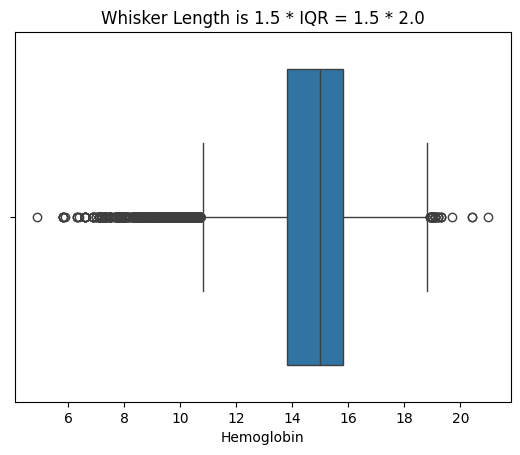

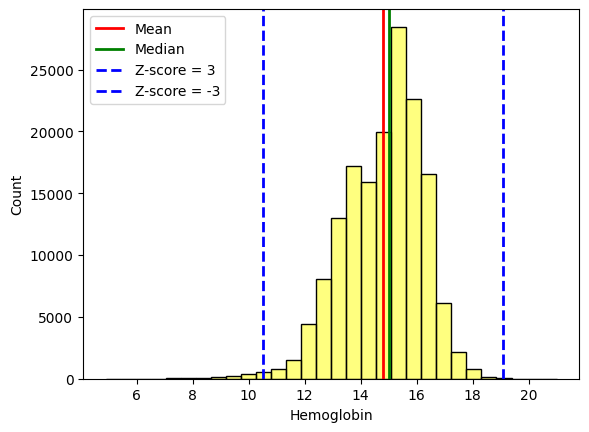

In [69]:
# Analyzing Hemoglobin Feature without information about the target
hemoglobin_feature = df["hemoglobin"]

# Central Tendency Measures
hemoglobin_mean = hemoglobin_feature.mean()
hemoglobin_median = hemoglobin_feature.median()

# Measures of Dispersion
hemoglobin_max_val = hemoglobin_feature.max()
hemoglobin_min_val = hemoglobin_feature.min()
hemoglobin_range = hemoglobin_max_val - hemoglobin_min_val
hemoglobin_std = hemoglobin_feature.std()
hemoglobin_skew = hemoglobin_feature.skew()
hemoglobin_iqr = hemoglobin_feature.quantile(0.75) - hemoglobin_feature.quantile(0.25)
z_score_positive3 = 3 * hemoglobin_std + hemoglobin_mean
z_score_negative3 = -3 * hemoglobin_std + hemoglobin_mean

print("Hemoglobin:")
print(f"Mean {round(hemoglobin_mean, 3)}")
print(f"Median {round(hemoglobin_median, 3)}")
print(f"Max Value {round(hemoglobin_max_val, 3)}")
print(f"Min Value {round(hemoglobin_min_val, 3)}")
print(f"Range {round(hemoglobin_range, 3)}")
print(f"Standard Deviation {round(hemoglobin_std, 3)}")
print(f"Skew {round(hemoglobin_skew, 3)}")
print(f"IQR {round(hemoglobin_iqr, 3)}")


# Box Plot for Hemoglobin Feature
sns.boxplot(x=hemoglobin_feature)
plt.xlabel('Hemoglobin')
plt.title(f"Whisker Length is 1.5 * IQR = 1.5 * {round(hemoglobin_iqr, 3)}")
plt.show()

# Histogram for Hemoglobin Feature
sns.histplot(hemoglobin_feature, bins=30, alpha=0.5, color="yellow")
plt.xlabel('Hemoglobin')
plt.ylabel('Count')
plt.axvline(hemoglobin_mean, c='red', ls='-', lw=2)
plt.axvline(hemoglobin_median, c='green', ls='-', lw=2)
plt.axvline(z_score_positive3, c='blue', ls='--', lw=2)
plt.axvline(z_score_negative3, c='blue', ls='--', lw=2)

plt.legend(labels=['Mean', 'Median', "Z-score = 3", "Z-score = -3"])
plt.show()

Hemoglobin:
Mean 14.228
Median 14.2
Max Value 20.4
Min Value 4.9
Range 15.5
Standard Deviation 1.463
Skew -0.379
IQR 2.1


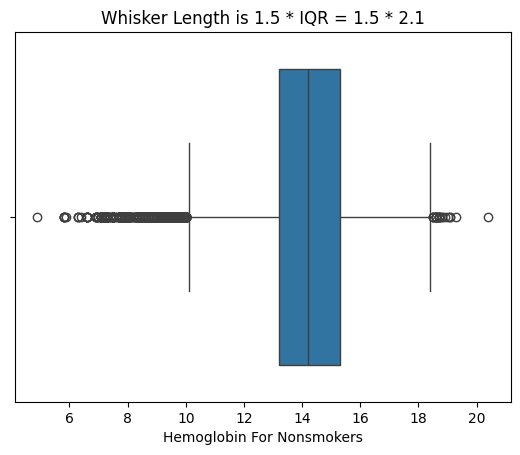

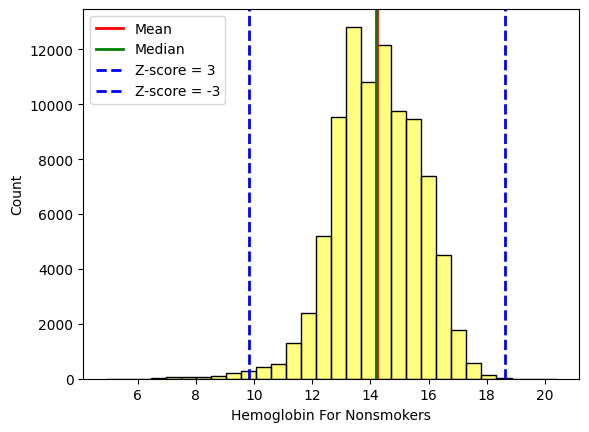

In [13]:
# Analyzing Hemoglobin Feature For Nonsmokers
hemoglobin_feature = df[df["smoking"] == 0]["hemoglobin"]

# Central Tendency Measures
hemoglobin_mean = hemoglobin_feature.mean()
hemoglobin_median = hemoglobin_feature.median()

# Measures of Dispersion
hemoglobin_max_val = hemoglobin_feature.max()
hemoglobin_min_val = hemoglobin_feature.min()
hemoglobin_range = hemoglobin_max_val - hemoglobin_min_val
hemoglobin_std = hemoglobin_feature.std()
hemoglobin_skew = hemoglobin_feature.skew()
hemoglobin_iqr = hemoglobin_feature.quantile(0.75) - hemoglobin_feature.quantile(0.25)
z_score_positive3 = 3 * hemoglobin_std + hemoglobin_mean
z_score_negative3 = -3 * hemoglobin_std + hemoglobin_mean

print("Hemoglobin:")
print(f"Mean {round(hemoglobin_mean, 3)}")
print(f"Median {round(hemoglobin_median, 3)}")
print(f"Max Value {round(hemoglobin_max_val, 3)}")
print(f"Min Value {round(hemoglobin_min_val, 3)}")
print(f"Range {round(hemoglobin_range, 3)}")
print(f"Standard Deviation {round(hemoglobin_std, 3)}")
print(f"Skew {round(hemoglobin_skew, 3)}")
print(f"IQR {round(hemoglobin_iqr, 3)}")


# Box Plot for Hemoglobin Feature
sns.boxplot(x=hemoglobin_feature)
plt.xlabel('Hemoglobin For Nonsmokers')
plt.title(f"Whisker Length is 1.5 * IQR = 1.5 * {round(hemoglobin_iqr, 3)}")
plt.show()

# Histogram for Hemoglobin Feature
sns.histplot(hemoglobin_feature, bins=30, alpha=0.5, color="yellow")
plt.xlabel('Hemoglobin For Nonsmokers')
plt.ylabel('Count')
plt.axvline(hemoglobin_mean, c='red', ls='-', lw=2)
plt.axvline(hemoglobin_median, c='green', ls='-', lw=2)
plt.axvline(z_score_positive3, c='blue', ls='--', lw=2)
plt.axvline(z_score_negative3, c='blue', ls='--', lw=2)

plt.legend(labels=['Mean', 'Median', "Z-score = 3", "Z-score = -3"])
plt.show()

Hemoglobin:
Mean 15.529
Median 15.6
Max Value 21.0
Min Value 8.3
Range 12.7
Standard Deviation 0.989
Skew -0.332
IQR 1.3


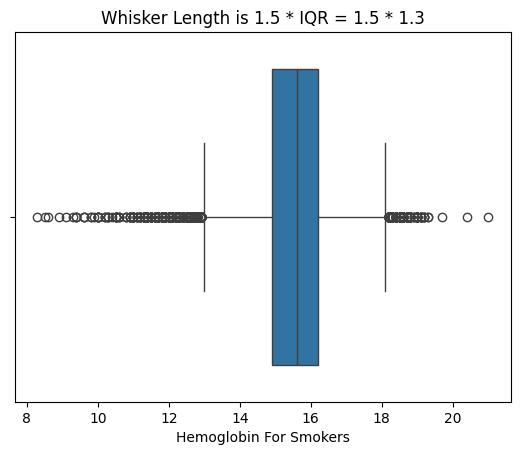

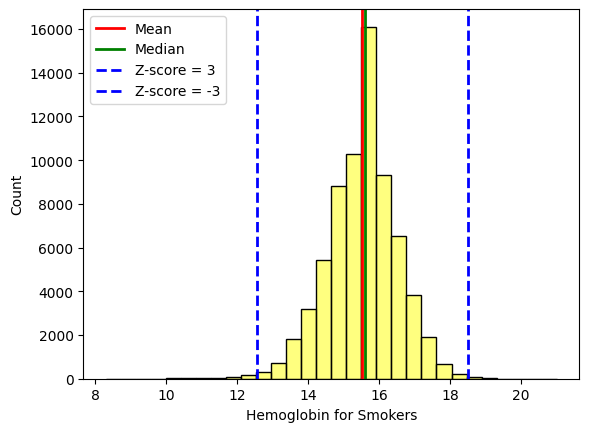

In [11]:
# Analyzing Hemoglobin Feature for Smokers
hemoglobin_feature = df[df["smoking"] == 1]["hemoglobin"]

# Central Tendency Measures
hemoglobin_mean = hemoglobin_feature.mean()
hemoglobin_median = hemoglobin_feature.median()

# Measures of Dispersion
hemoglobin_max_val = hemoglobin_feature.max()
hemoglobin_min_val = hemoglobin_feature.min()
hemoglobin_range = hemoglobin_max_val - hemoglobin_min_val
hemoglobin_std = hemoglobin_feature.std()
hemoglobin_skew = hemoglobin_feature.skew()
hemoglobin_iqr = hemoglobin_feature.quantile(0.75) - hemoglobin_feature.quantile(0.25)
z_score_positive3 = 3 * hemoglobin_std + hemoglobin_mean
z_score_negative3 = -3 * hemoglobin_std + hemoglobin_mean

print("Hemoglobin:")
print(f"Mean {round(hemoglobin_mean, 3)}")
print(f"Median {round(hemoglobin_median, 3)}")
print(f"Max Value {round(hemoglobin_max_val, 3)}")
print(f"Min Value {round(hemoglobin_min_val, 3)}")
print(f"Range {round(hemoglobin_range, 3)}")
print(f"Standard Deviation {round(hemoglobin_std, 3)}")
print(f"Skew {round(hemoglobin_skew, 3)}")
print(f"IQR {round(hemoglobin_iqr, 3)}")


# Box Plot for Hemoglobin Feature
sns.boxplot(x=hemoglobin_feature)
plt.xlabel('Hemoglobin For Smokers')
plt.title(f"Whisker Length is 1.5 * IQR = 1.5 * {round(hemoglobin_iqr, 3)}")
plt.show()

# Histogram for Hemoglobin Feature
sns.histplot(hemoglobin_feature, bins=30, alpha=0.5, color="yellow")
plt.xlabel('Hemoglobin for Smokers')
plt.ylabel('Count')
plt.axvline(hemoglobin_mean, c='red', ls='-', lw=2)
plt.axvline(hemoglobin_median, c='green', ls='-', lw=2)
plt.axvline(z_score_positive3, c='blue', ls='--', lw=2)
plt.axvline(z_score_negative3, c='blue', ls='--', lw=2)

plt.legend(labels=['Mean', 'Median', "Z-score = 3", "Z-score = -3"])
plt.show()

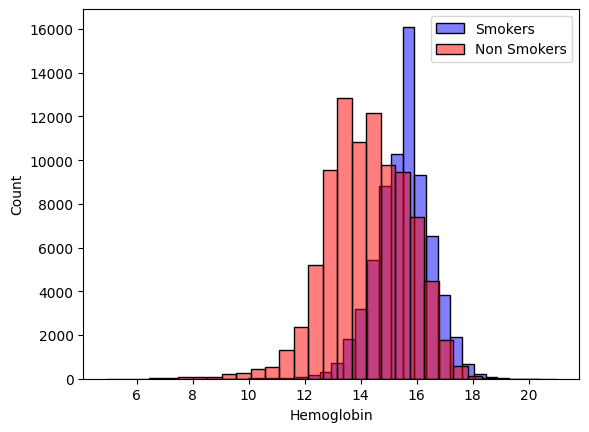

In [10]:
hemoglobin_smokers = df[df["smoking"] == 1]["hemoglobin"]
hemoglobin_nonsmokers = df[df["smoking"] == 0]["hemoglobin"]


# Plotting histograms with Seaborn
sns.histplot(data=hemoglobin_smokers, color='blue', alpha=0.5, bins=30, label='Smokers', multiple='layer')
sns.histplot(data=hemoglobin_nonsmokers, color='red', alpha=0.5, bins=30, label='Non Smokers', multiple='layer')

# Adding labels and title
plt.xlabel('Hemoglobin')
plt.ylabel('Count')
plt.legend()

# Show the plot
plt.show()

Feature 2: fasting blood sugar

In [21]:
print("hearing(right) unique values:", df['hearing(right)'].unique())
print("dental caries unique values:", df['dental caries'].unique())

hearing(right) unique values: [1 2]
dental caries unique values: [0 1]


# **Feature 2** : Hearing

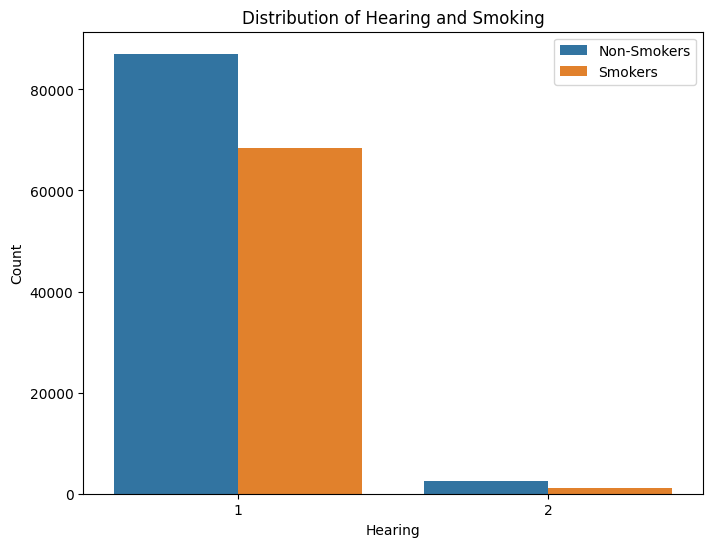

In [9]:
# Hearing Feature with respect to the target Histogram
plt.figure(figsize=(8, 6))
sns.countplot(x="hearing(right)", data=df, hue="smoking")
plt.xlabel('Hearing')
plt.ylabel('Count')
plt.title('Distribution of Hearing and Smoking')
plt.legend(labels=["Non-Smokers", "Smokers"])
plt.show()

### **Feature 4 : Fasting Blood Sugar**

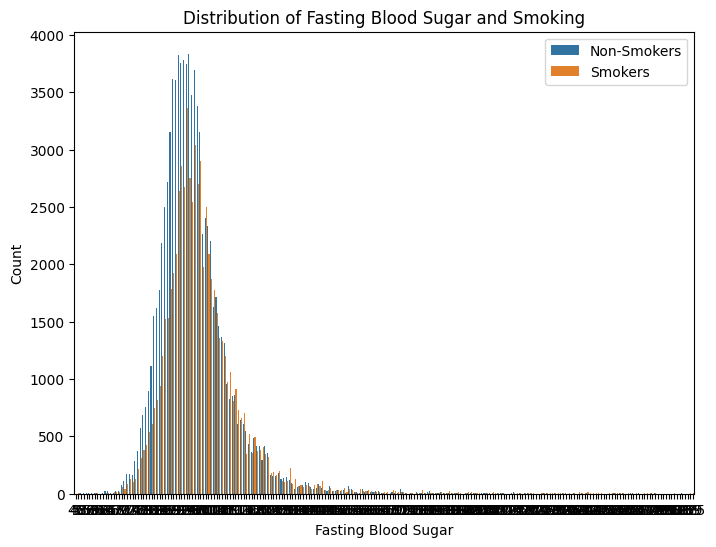

In [12]:
# Dental Caries Feature with respect to the target Histogram
plt.figure(figsize=(8, 6))
sns.countplot(x="fasting blood sugar", data=df, hue="smoking")
plt.xlabel('Fasting Blood Sugar')
plt.ylabel('Count')
plt.title('Distribution of Fasting Blood Sugar and Smoking')
plt.legend(labels=["Non-Smokers", "Smokers"])
plt.show()


+--------------------+---------+
| Statistic          |   Value |
+====================+=========+
| Mean               | 100.031 |
+--------------------+---------+
| Median             |  97     |
+--------------------+---------+
| Max Value          | 375     |
+--------------------+---------+
| Min Value          |  48     |
+--------------------+---------+
| Range              | 327     |
+--------------------+---------+
| Standard Deviation |  16.623 |
+--------------------+---------+
| Skew               |   3.759 |
+--------------------+---------+
| IQR                |  14     |
+--------------------+---------+


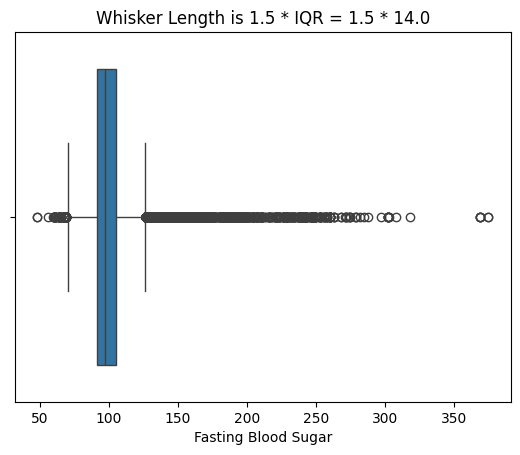

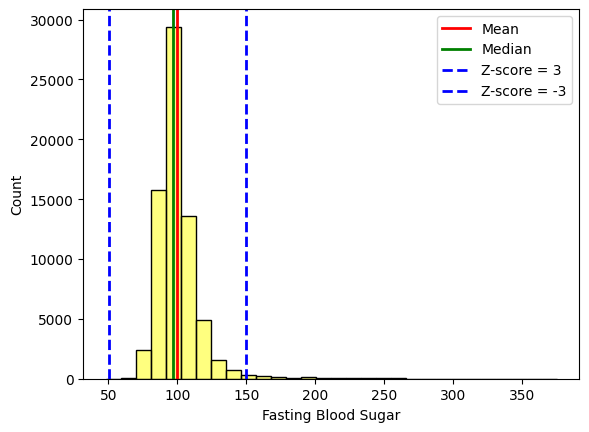

In [15]:

# Analyzing Fasting Blood Sugar Feature with smokers
fasting_blood_sugar_feature = df[df["smoking"] == 1]["fasting blood sugar"]

# Central Tendency Measures
fasting_blood_sugar_mean = fasting_blood_sugar_feature.mean()
fasting_blood_sugar_median = fasting_blood_sugar_feature.median()

# Measures of Dispersion
fasting_blood_sugar_max_val = fasting_blood_sugar_feature.max()
fasting_blood_sugar_min_val = fasting_blood_sugar_feature.min()
fasting_blood_sugar_range = fasting_blood_sugar_max_val - fasting_blood_sugar_min_val
fasting_blood_sugar_std = fasting_blood_sugar_feature.std()
fasting_blood_sugar_skew = fasting_blood_sugar_feature.skew()
fasting_blood_sugar_iqr = fasting_blood_sugar_feature.quantile(0.75) - fasting_blood_sugar_feature.quantile(0.25)
z_score_positive3 = 3 * fasting_blood_sugar_std + fasting_blood_sugar_mean
z_score_negative3 = -3 * fasting_blood_sugar_std + fasting_blood_sugar_mean

# Create a list of lists to represent the table
table_data = [
    ["Mean", round(fasting_blood_sugar_mean, 3)],
    ["Median", round(fasting_blood_sugar_median, 3)],
    ["Max Value", round(fasting_blood_sugar_max_val, 3)],
    ["Min Value", round(fasting_blood_sugar_min_val, 3)],
    ["Range", round(fasting_blood_sugar_range, 3)],
    ["Standard Deviation", round(fasting_blood_sugar_std, 3)],
    ["Skew", round(fasting_blood_sugar_skew, 3)],
    ["IQR", round(fasting_blood_sugar_iqr, 3)]
]

# Print the table
print(tabulate(table_data, headers=["Statistic", "Value"], tablefmt="grid"))

# Box Plot for Fasting Blood Sugar Feature
sns.boxplot(x=fasting_blood_sugar_feature)
plt.xlabel('Fasting Blood Sugar')
plt.title(f"Whisker Length is 1.5 * IQR = 1.5 * {round(fasting_blood_sugar_iqr, 3)}")
plt.show()

# Histogram for Fasting Blood Sugar Feature
sns.histplot(fasting_blood_sugar_feature, bins=30, alpha=0.5, color="yellow")
plt.xlabel('Fasting Blood Sugar')
plt.ylabel('Count')
plt.axvline(fasting_blood_sugar_mean, c='red', ls='-', lw=2)
plt.axvline(fasting_blood_sugar_median, c='green', ls='-', lw=2)
plt.axvline(z_score_positive3, c='blue', ls='--', lw=2)
plt.axvline(z_score_negative3, c='blue', ls='--', lw=2)

plt.legend(labels=['Mean', 'Median', "Z-score = 3", "Z-score = -3"])
plt.show()



+--------------------+---------+
| Statistic          |   Value |
+====================+=========+
| Mean               |  97.048 |
+--------------------+---------+
| Median             |  95     |
+--------------------+---------+
| Max Value          | 365     |
+--------------------+---------+
| Min Value          |  46     |
+--------------------+---------+
| Range              | 319     |
+--------------------+---------+
| Standard Deviation |  14.106 |
+--------------------+---------+
| Skew               |   3.006 |
+--------------------+---------+
| IQR                |  13     |
+--------------------+---------+


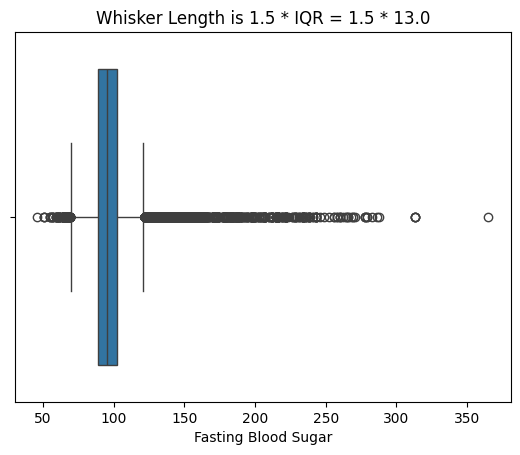

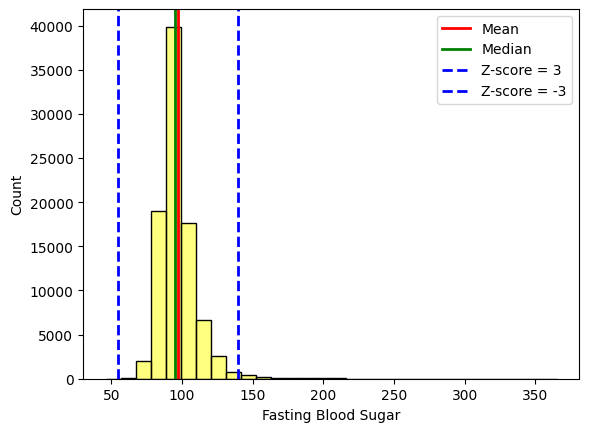

In [16]:
# Analyzing Fasting Blood Sugar Feature with non-smokers
fasting_blood_sugar_feature = df[df["smoking"] == 0]["fasting blood sugar"]

# Central Tendency Measures
fasting_blood_sugar_mean = fasting_blood_sugar_feature.mean()
fasting_blood_sugar_median = fasting_blood_sugar_feature.median()

# Measures of Dispersion
fasting_blood_sugar_max_val = fasting_blood_sugar_feature.max()
fasting_blood_sugar_min_val = fasting_blood_sugar_feature.min()
fasting_blood_sugar_range = fasting_blood_sugar_max_val - fasting_blood_sugar_min_val
fasting_blood_sugar_std = fasting_blood_sugar_feature.std()
fasting_blood_sugar_skew = fasting_blood_sugar_feature.skew()
fasting_blood_sugar_iqr = fasting_blood_sugar_feature.quantile(0.75) - fasting_blood_sugar_feature.quantile(0.25)
z_score_positive3 = 3 * fasting_blood_sugar_std + fasting_blood_sugar_mean
z_score_negative3 = -3 * fasting_blood_sugar_std + fasting_blood_sugar_mean

# Create a list of lists to represent the table
table_data = [
    ["Mean", round(fasting_blood_sugar_mean, 3)],
    ["Median", round(fasting_blood_sugar_median, 3)],
    ["Max Value", round(fasting_blood_sugar_max_val, 3)],
    ["Min Value", round(fasting_blood_sugar_min_val, 3)],
    ["Range", round(fasting_blood_sugar_range, 3)],
    ["Standard Deviation", round(fasting_blood_sugar_std, 3)],
    ["Skew", round(fasting_blood_sugar_skew, 3)],
    ["IQR", round(fasting_blood_sugar_iqr, 3)]
]

# Print the table
print(tabulate(table_data, headers=["Statistic", "Value"], tablefmt="grid"))

# Box Plot for Fasting Blood Sugar Feature
sns.boxplot(x=fasting_blood_sugar_feature)
plt.xlabel('Fasting Blood Sugar')
plt.title(f"Whisker Length is 1.5 * IQR = 1.5 * {round(fasting_blood_sugar_iqr, 3)}")
plt.show()

# Histogram for Fasting Blood Sugar Feature
sns.histplot(fasting_blood_sugar_feature, bins=30, alpha=0.5, color="yellow")
plt.xlabel('Fasting Blood Sugar')
plt.ylabel('Count')
plt.axvline(fasting_blood_sugar_mean, c='red', ls='-', lw=2)
plt.axvline(fasting_blood_sugar_median, c='green', ls='-', lw=2)
plt.axvline(z_score_positive3, c='blue', ls='--', lw=2)
plt.axvline(z_score_negative3, c='blue', ls='--', lw=2)

plt.legend(labels=['Mean', 'Median', "Z-score = 3", "Z-score = -3"])
plt.show()

